# Taller Interactivo: Árboles de Decisión y Evaluación de Modelos

## Caso de Estudio: Social_Network_Ads

Este taller profesional se centra en la construcción, interpretación y evaluación de un modelo de Árbol de Decisión utilizando el dataset _Social_Network_Ads_. Se evaluarán aspectos técnicos y se comparará el desempeño con un modelo de Regresión Logística, analizando métricas de evaluación y posibles indicadores de sobreajuste.

## 2. Objetivos del Taller

En este taller se pretende:
- Comprender los fundamentos teóricos de los árboles de decisión.
- Realizar un análisis exploratorio y revisión de datos.
- Aplicar la estratificación en el particionado de datos.
- Entrenar y evaluar un modelo de Árbol de Decisión.
- Visualizar y analizar la matriz de confusión y la curva ROC.
- Ajustar el modelo para controlar la complejidad y el sobreajuste.
- Promover el análisis crítico de los resultados obtenidos.

## 3. Carga del Dataset y Primer Análisis

En esta sección se carga el dataset _Social_Network_Ads_ desde una URL y se visualizan las primeras filas y la información general. Esto permitirá conocer la estructura de los datos y los tipos de variables presentes.

In [1]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv

--2025-04-03 02:21:24--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0.001s  

2025-04-03 02:21:24 (16.9 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('Social_Network_Ads.csv')


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from imblearn.over_sampling import SMOTE

%matplotlib inline

In [3]:
# Mostrar las primeras filas
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## 4. Revisión de Variables y Tipos de Datos

Examina las variables del dataset y discute brevemente el significado de cada una. Reflexiona sobre la relevancia de cada variable para el análisis y el modelado.

_**Respuesta:**_


*   User ID: Es un identificador para cada usuario en el conjunto de datos. Este no es muy relevante para el análisis predictivo ya que es un identificador injustificado.
*   Age: Representa la edad del usuario en años. Esta es una variable relevante ya que las personas de diferentes grupos de edad pueden tener diferentes comportamientos de compra y preferencias.
*   EstimatedSalary: Representa el salario estimado del usuario. Esta es una variable relevante ya que el poder adquisitivo puede influir en la decisión de compra.
*   Purchased: Esta es la variable objetivo que indica si el usuario compró (1) o no compró (0) un producto. Este es relevante porque es la variable que se desea predecir.





In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## 5. Visualización de la Distribución de la Variable Objetivo

Visualiza la distribución de la variable `Purchased` usando un gráfico de barras. Esto permitirá identificar si existe un balance entre las clases.

**Pregunta para el grupo:**
- ¿La variable `Purchased` se encuentra balanceada? ¿Qué implicaciones podría tener un desequilibrio en la modelación?

_**Respuesta**:_ La variable Purchased no se encuentra balanceada ya que las frecuencias no son similares, se puede observar que la clase "No compró" es notablemente mayor que la clase "Compró". Un desiquilibrio en la modelación podría implicar un sesgo en el modelo, métricas de evaluación engañosas y dificultad para identificar patrones.

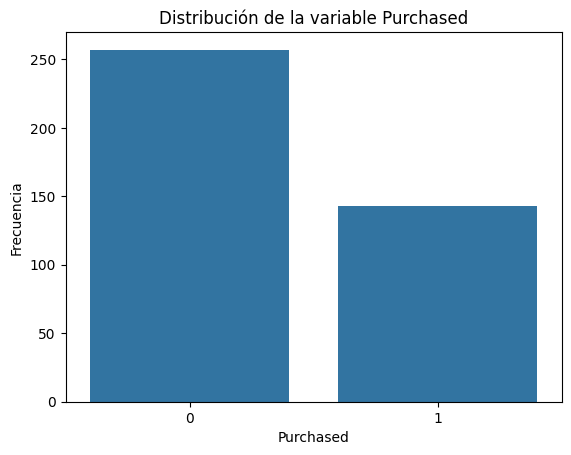

In [7]:
sns.countplot(x='Purchased', data=df)
plt.title('Distribución de la variable Purchased')
plt.xlabel('Purchased')
plt.ylabel('Frecuencia')

plt.show()

## 6. Análisis de la Distribución y Reflexión

Discute la distribución observada. Reflexiona sobre cómo un posible desbalance podría afectar la performance del modelo y qué estrategias se podrían utilizar para mitigarlo (por ejemplo, SMOTE en otros casos).

_**Respuesta:**_ Un desbalance puede afectar negativamente al rendimiento del modelo. Es importante analizar la distribución observada y aplicar estrategias de remuestreo como SMOTE para mejorar la capacidad del modelo, tambien estrategias de precisión como F1-score, curva ROC AUC o recall, para tener una evaluación más completa del modelo.

## 7. Selección de Variables para el Modelo

Para este taller, se utilizarán las variables `Age` y `EstimatedSalary` como características para predecir `Purchased`.

**Pregunta:**
- ¿Por qué considerarían estas dos variables relevantes para predecir la compra?

_**Respuesta:** Se utilizan estas dos variables para predecir "Purchased" ya que ambas están relacionadas con factores que influyen en las decisiones de compra de las personas, como la madurez, la experiencia, la estabilidad económica, el poder adquisitivo, el estilo de vida, las necesidades y los deseos.


## 8. División de Datos: Entrenamiento y Prueba

Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.

**Pregunta:**
- ¿Qué ventajas ofrece la estratificación al dividir el dataset?

_**Respuesta:**_ La estratificación ayuda a crear conjuntos de entrenamiento y prueba más balanceados y representativos, lo que conduce a una evaluación del modelo más exacta y a una mejor generalización.

In [8]:

X = df[['Age',"EstimatedSalary"]]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

print("Distribución de clases en entrenamiento (proporciones):")
print(y_train.value_counts(normalize=True))

Dimensiones del conjunto de entrenamiento: (300, 2)
Dimensiones del conjunto de prueba: (100, 2)
Distribución de clases en entrenamiento (proporciones):
Purchased
0    0.643333
1    0.356667
Name: proportion, dtype: float64


In [9]:
if y_train.value_counts(normalize=True).max() > 0.6:
    print("Aplicando SMOTE para balancear el conjunto de entrenamiento...")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("Nueva distribución de clases:")
    print(pd.Series(y_train).value_counts(normalize=True))

Aplicando SMOTE para balancear el conjunto de entrenamiento...
Nueva distribución de clases:
Purchased
1    0.5
0    0.5
Name: proportion, dtype: float64


## 9. Entrenamiento Inicial del Modelo de Árbol de Decisión

Se entrenará un modelo de Árbol de Decisión sin restricciones de profundidad utilizando el conjunto de entrenamiento.

**Pregunta:**
- ¿Qué implica entrenar un modelo sin restricciones de profundidad en términos de complejidad y riesgo de sobreajuste?

_**Respuesta:**_ Entrenar un modelo de árbol de desición sin restricciones de profundidad puede resultar en un modelo complejo (un árbol con muchas ramas y hojas) que es más probable que se sobrejuste a los datos de entrenamiento.

In [38]:
# Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## 10. Evaluación del Modelo: Análisis de Métricas

Analizaremos las métricas de evaluación obtenidas (exactitud, precisión, recall, F1-Score) y la matriz de confusión.

**Pregunta:**
- ¿Qué información específica nos aporta la matriz de confusión respecto a los errores del modelo?

_**Respuesta:**_ La matriz de confusión nos permite identificar los tipos de errores (distinguir entre falsos positivos y falsos negativos), evaluar el rendimiento del modelo (Calcular las métricas F1-score, precisión, recall) y tomar desiciones informadas.

Reporte de Clasificación - Árbol de Decisión (Test):
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.82      0.86      0.84        36

    accuracy                           0.88       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.88      0.88       100

Reporte de Clasificación - Regresión Logística (Test):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        64
           1       0.69      0.75      0.72        36

    accuracy                           0.79       100
   macro avg       0.77      0.78      0.78       100
weighted avg       0.79      0.79      0.79       100



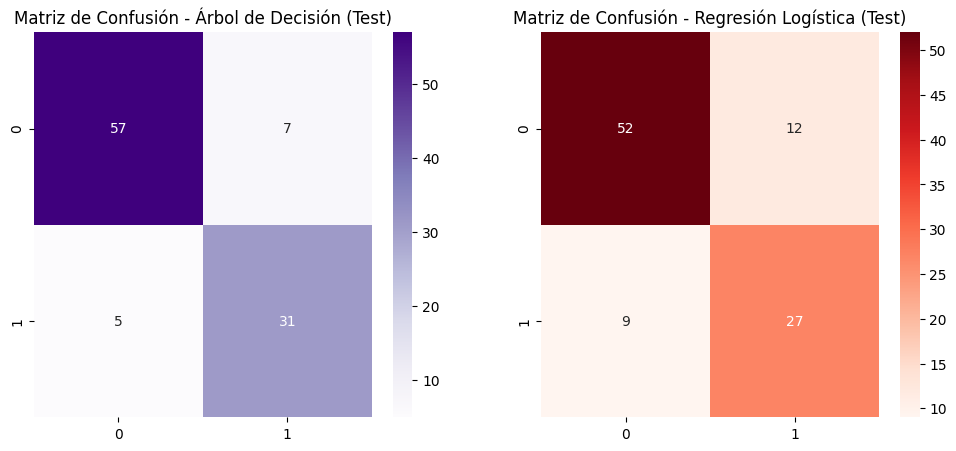

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       193
           1       1.00      0.99      0.99       193

    accuracy                           0.99       386
   macro avg       0.99      0.99      0.99       386
weighted avg       0.99      0.99      0.99       386

Reporte de Clasificación - Regresión Logística (Train):
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       193
           1       0.86      0.87      0.86       193

    accuracy                           0.86       386
   macro avg       0.86      0.86      0.86       386
weighted avg       0.86      0.86      0.86       386



In [39]:
## Evaluación en el conjunto de prueba
# Predicciones en test
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("Reporte de Clasificación - Árbol de Decisión (Test):")
print(classification_report(y_test, y_pred_dt))

print("Reporte de Clasificación - Regresión Logística (Test):")
print(classification_report(y_test, y_pred_lr))

# Matrices de Confusión
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=ax[0], cmap='Purples')
ax[0].set_title("Matriz de Confusión - Árbol de Decisión (Test)")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[1], cmap='Reds')
ax[1].set_title("Matriz de Confusión - Regresión Logística (Test)")
plt.show()

## Evaluación en el conjunto de entrenamiento para detectar overfitting
y_pred_train_dt = dt_model.predict(X_train)
y_pred_train_lr = lr_model.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_dt))

print("Reporte de Clasificación - Regresión Logística (Train):")
print(classification_report(y_train, y_pred_train_lr))

## 11. Visualización de la Curva ROC y Cálculo del AUC

Genera la curva ROC y calcula el AUC para evaluar la capacidad discriminativa del modelo.

**Pregunta:**
- ¿Cómo interpretan la curva ROC y qué indica un valor de AUC alto o bajo?

**_Respuesta:_** La curva ROC visualiza el rendimiento del modelo en diferentes umbrales. El valor AUC cuantifica el rendimiento general del modelo, con valores más altos que indican una mejor capacidad de discriminación. Un AUC alto (cercano a 1), indica que el modelo tiene una excelente capacdidad para distinguir entre dos clases. Un AUC bajo (cercano a 0.5) indica que el modelo no es mejor que una clasificación aleatoria. Finalmente un AUC entre (0.5 y 1) indica un rendimiento intermedio del modelo.

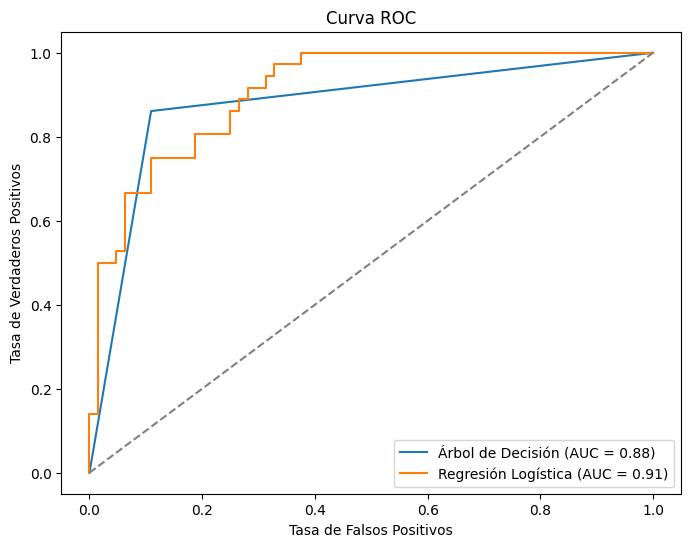

In [12]:
# Obtener probabilidades en test
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Calcular ROC y AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_lr = auc(fpr_lr, tpr_lr)

# Graficar ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Árbol de Decisión (AUC = {auc_dt:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Regresión Logística (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

## 12. Visualización e Interpretación del Árbol de Decisión

Exporta y visualiza el árbol de decisión utilizando GraphViz y pydotplus. Analiza la estructura, las reglas y la importancia de cada nodo.

**Preguntas:**
- ¿Cuál es la regla de decisión en el primer nodo?
- ¿Cómo se interpretan las ramas y las hojas en relación a las variables `Age` y `EstimatedSalary`?
- ¿Qué partes del árbol podrían estar contribuyendo al sobreajuste?

_**Respuesta 1:**_ La regla de decisión en el primer nodo es: Age<= 37.5. Significa que si la edad de una persona es menor o iual a 37.5 años, el arbol sigue la rama izquierda. Si es al contrario, sigue la rama derecha.

_**Respuesta 2:**_ Las Ramas representan las decisiones o condiciones basadas en las variables. Cada rama que sale de un nodo representa un posible valor o rango de valores para la variable que se está evaluando en ese nodo. Las Hojas representan las predicciones finales del modelo. Cada hoja está asociada a una clase.

_**Respuesta 3:**_ Nodos muy profundos con pocas muestras, es decir que si el árbol tiene ramas muy largas que terminan en nodos con muy pocas muestras, es posible que esté aprendiendo patrones muy específicos de los datos de entrenamiento que no se generalizan bien a nuevos datos. Las reglas muy complejas, si el árbol tiene muchas ramas y condiciones, podría estar modelando el ruido en los datos de entrenamiento en lugar de los patrones reales. Finalmente, la profundidad excesiva, quiere decir si un árbol con demasiados niveles de profundidad puede indicar sobreajuste ya que intenta capturar cada detalle de los datos de entrenamiento, perdiendo así la generalización del modelo.

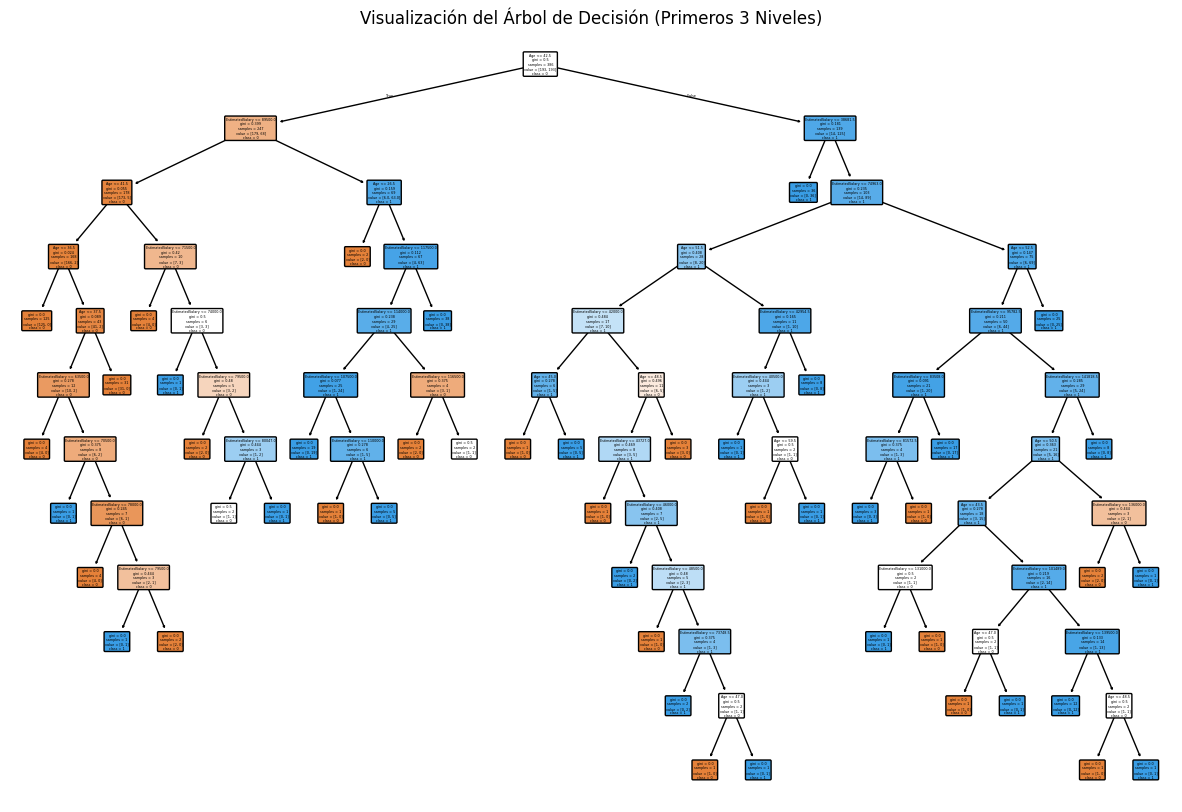

In [22]:
plt.figure(figsize=(15,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["0", "1"], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión (Primeros 3 Niveles)")
plt.show()

## 13. Análisis Crítico del Modelo Inicial

Revisa los resultados obtenidos en el modelo sin restricciones y discute:
- ¿Existen indicios de sobreajuste? ¿Cómo se comparan las métricas entre entrenamiento y prueba?
- ¿Qué mejoras se podrían implementar para optimizar la generalización del modelo?

_**Respuesta 1:**_ El modelo tiene un rendimiento casi perfecto en el conjunto de entrenamiento (precisión, recall y F1-score cercanos a 1), mientras que en el conjunto de prueba las métricas son más bajas (alrededor de 0.89 para precisión y 0.8 para recall y F1-score). Esta diferencia sugiere que el modelo se ha ajustado demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos.

_**Respuesta 2:**_ Una manera podría ser controlar la complejidad del árbol, se podría limitar la profundidad del árbol; ajustar el número mínimo de muestras por hoja (para evitar que el árbol cree hojas con pocos datos); eliminar ramas que no contribuyan a la presición del modelo y ajustar el número mínimo de muestras para dividir un nodo. Además, se podría recopilar más datos para que el modelo aprenda patrones más generales.

## 14. Ajuste del Modelo: Control de la Profundidad

Entrena un segundo modelo de Árbol de Decisión limitando la profundidad (por ejemplo, `max_depth=5`) y evalúa su desempeño.

**Pregunta:**
- ¿Qué cambios se observan en las métricas al limitar la profundidad del árbol? ¿Cómo afecta esto a la capacidad del modelo de generalizar?

In [14]:
# Árbol de Decisión
dt_model_depth5 = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_model_depth5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Reporte de Clasificación - Árbol de Decisión (Profundidad 5, Test):
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        64
           1       0.83      0.83      0.83        36

    accuracy                           0.88       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.88      0.88       100



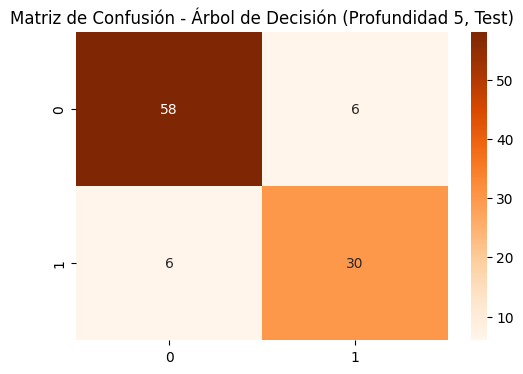

Reporte de Clasificación - Árbol de Decisión (Profundidad 5, Train):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       193
           1       0.95      0.95      0.95       193

    accuracy                           0.95       386
   macro avg       0.95      0.95      0.95       386
weighted avg       0.95      0.95      0.95       386



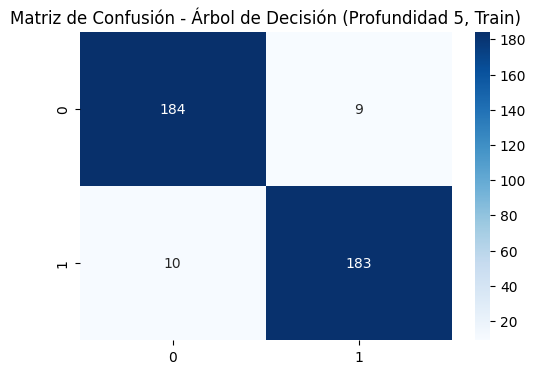

In [34]:
# Predicciones en el conjunto de prueba
y_pred_dt_depth5 = dt_model_depth5.predict(X_test)

# Reporte de Clasificación
print("Reporte de Clasificación - Árbol de Decisión (Profundidad 5, Test):")
print(classification_report(y_test, y_pred_dt_depth5))

# Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt_depth5), annot=True, fmt='d', cmap='Oranges')
plt.title("Matriz de Confusión - Árbol de Decisión (Profundidad 5, Test)")
plt.show()

# Evaluación en el conjunto de entrenamiento para detectar overfitting
y_pred_train_dt_depth5 = dt_model_depth5.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Profundidad 5, Train):")
print(classification_report(y_train, y_pred_train_dt_depth5))

# Puedes agregar también la matriz de confusión en el conjunto de entrenamiento
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train, y_pred_train_dt_depth5), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Árbol de Decisión (Profundidad 5, Train)")
plt.show()

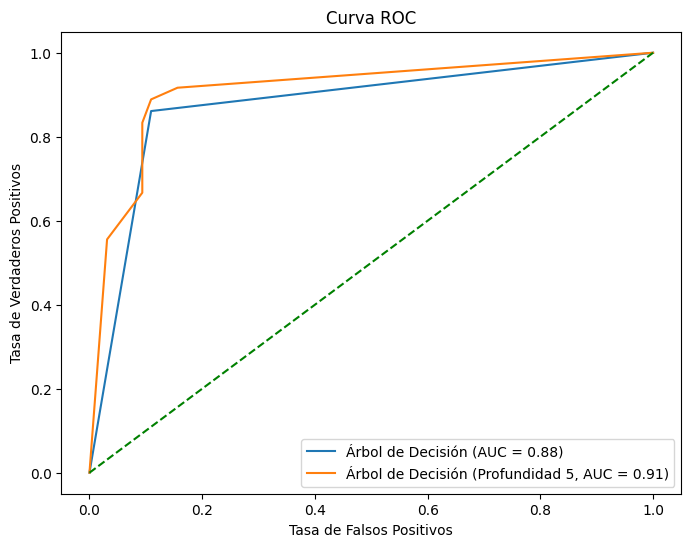

In [21]:
# Obtener probabilidades en test
y_prob_dt_depth5 = dt_model_depth5.predict_proba(X_test)[:, 1]

# Calcular ROC y AUC
fpr_dt_depth5, tpr_dt_depth5, _ = roc_curve(y_test, y_prob_dt_depth5)
auc_dt_depth5 = auc(fpr_dt_depth5, tpr_dt_depth5)

# Graficar ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Árbol de Decisión (AUC = {auc_dt:.2f})")
plt.plot(fpr_dt_depth5, tpr_dt_depth5, label=f"Árbol de Decisión (Profundidad 5, AUC = {auc_dt_depth5:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

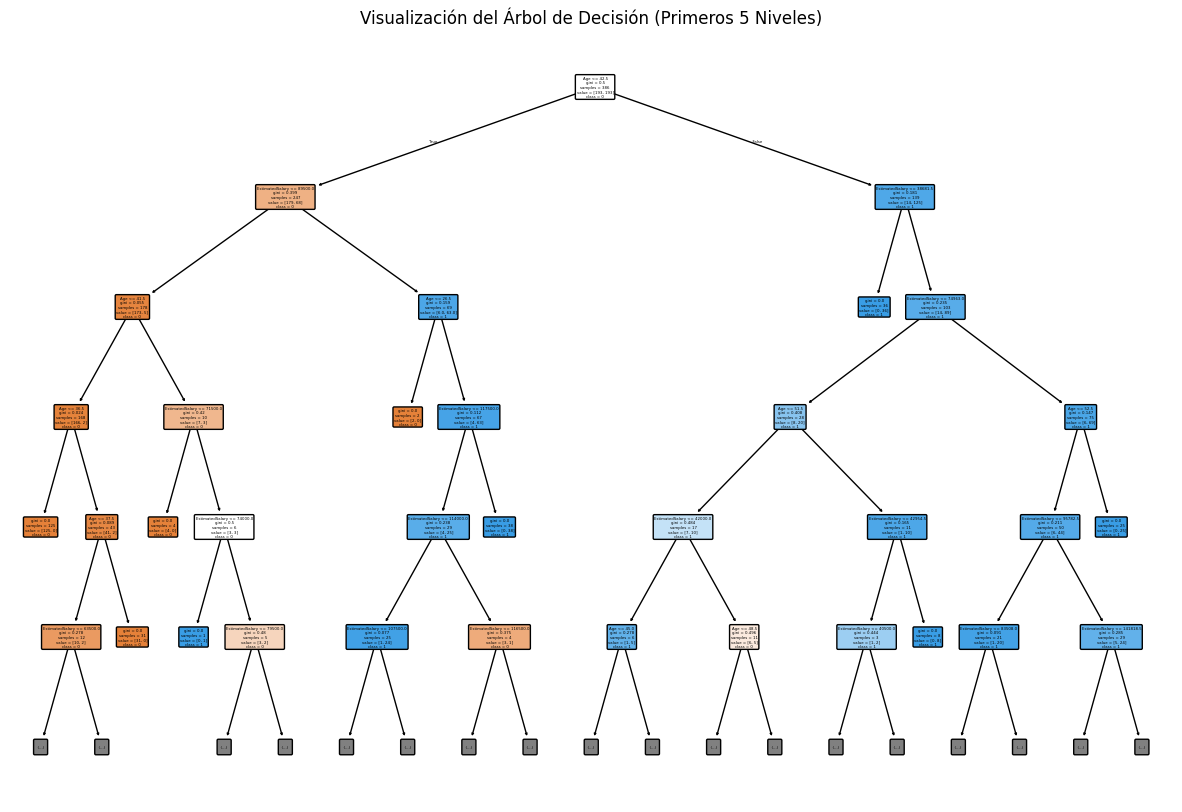

In [24]:
plt.figure(figsize=(15,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["0", "1"], filled=True, rounded=True,max_depth=5)
plt.title("Visualización del Árbol de Decisión (Primeros 5 Niveles)")
plt.show()

## 15. Discusión Final y Comparación de Modelos

Analiza y compara los resultados obtenidos del modelo inicial y el modelo ajustado. Reflexiona sobre los siguientes aspectos:
- ¿Cuál de los dos modelos ofrece un mejor balance entre complejidad e interpretabilidad?
- ¿Qué indicios sugieren un mejor comportamiento frente al sobreajuste?
- ¿Qué otros modelos (por ejemplo, Regresión Logística) podrían utilizarse como referencia para evaluar el desempeño?

Utiliza estos puntos para guiar una discusión profesional y técnica entre los participantes.

_**Respuesta 1:**_ En cuanto a complejidad e interpretabilidad.En el modelo inicial no habían restrincciones de profundidad, el árbol podía crecer hasta tener muchos niveles y nodos, haciendolo más complejo y díficil de interpretar. En cambio en el modelo ajustado, el árbol tiene una profundidad de 5 niveles, lo que facilita su interpretación y reduce su complejidad.

**_Respuesta 2:_** En el Modelo Inicial, se puede observar cómo las métricas de rendimiento (precisión, recall, F1-score) son casi perfectas en el conjunto de entrenamiento (0.99 o 1), pero disminuyen en el conjunto de prueba (0.82,0.84,0.9). Esto significa que el modelo se ha "memorizado" los datos de entrenamiento y no generaliza bien a datos nuevos. Significa que hay indicios de sobreajuste.
En el Modelo Ajustado, al limitar la profundidad se controla el sobreajuste. La diferencia entre las métricas de entrenamiento (0.95) y prueba (0.91,0.83) es menor, lo que indica una mejor generalización.

_**Respuesta 3:**_ Modelos de Referencia para evaluar el rendimiento, además de la Regresión Logística, estan los Random Forest (conjunto de árboles de decisión que promedia las predicciones para reducir el sobreajuste) y las Máquinas de Vectores de Soporte (SVM) que pueden manejar datos no lineales y son robustas.